In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Box, VBox, HBox

import ipywidgets as widgets 
#%matplotlib widget

In [14]:
#Ranges/ Percentages study 

#Idea, interactive grap showing the 70th percentile (an others) of Highest Morning/day push, depending on PM Range(%) and Pm drop(%)

In [15]:
df = pd.read_csv(r'C:\Users\migue\Trading\My Statistics\Gap Up Short (+70%)CSV.csv', delimiter=';')
# Formatting Million/Thousands Columns for better handling
df['MC (M)'] = df['MC (M)']/1000000
df['Float (M)'] = df['Float (M)']/1000000
df['PM Volume (M)'] = df['PM Volume (M)']/1000000
df['Av Vol (90) (k)'] = df['Av Vol (90) (k)']/1000

In [16]:
df

,Date,Ticker,MC (M),Float (M),PM Volume (M),Relative Vol,Av Vol (90) (k),PM Change %,Change % (Prev.Day),News,...,Best Entry T,Best Exit T,Drop %,PM Spike Drop (%),Closed Red?,H(M) %,H(D) %,L(D) %,PM Float Rotations,Chart
0,20/04/2020,BRQS,278.867040,24.000000,0.130000,NaN,88.000000,96.940000,20.000000,1,...,9:30,10:23,34.0,12.289011,1,0.000000,0.000000,-48.275862,0.005417,Gap Up Short (+70%)\20200420 BRQS.PNG
1,20/04/2020,NBY,88.032420,16.000000,11.507000,NaN,2659.000000,132.890000,76.000000,1,...,9:30,10:34,26.0,0.000000,1,0.000000,0.000000,-27.647059,0.719187,Gap Up Short (+70%)\20200420 NBY.PNG
2,21/04/2020,WATT,99.560000,28.000000,10.100000,NaN,2307.000000,162.000000,243.000000,1,...,9:38,10:10,23.0,8.106436,1,36.363636,45.454545,-38.750000,0.360714,Gap Up Short (+70%)\20200421 WATT.PNG
3,22/04/2020,ATIF,159.900000,6.600000,0.410000,NaN,156.000000,105.000000,21.000000,1,...,9:31,10:40,33.0,21.331946,1,2.222222,2.222222,-45.108696,0.062121,Gap Up Short (+70%)\20200422 ATIF.PNG
4,22/04/2020,PECK,55.614000,1.940000,0.458000,NaN,201.000000,79.400000,74.000000,2,...,9:50,10:28,38.0,1.734574,1,44.531250,44.531250,-43.675676,0.236082,Gap Up Short (+70%)\20200422 PECK.PNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,12/11/2020,IMAC,19.537184,7.082818,7.617769,475.277930,1147.558233,95.678271,3.700000,2,...,0.404166667,0.58125,42.0,59.422868,1,56.790123,56.790123,-44.488189,1.075528,done
233,16/11/2020,HPR,16.187251,2.230000,1.361372,4.523376,119.572944,61.968085,23.278689,1,...,0.409027778,0.497916667,22.0,51.682258,0,2.547771,19.426752,-34.666667,0.610481,done
234,16/11/2020,ATHE,59.000000,13.700000,5.000000,NaN,NaN,150.000000,2.000000,1,...,0.404166667,0.445833333,28.0,42.490119,1,23.024055,23.024055,-31.843575,0.364964,done
235,17/11/2020,LXRX,234.950000,113.286076,22.844876,64.456936,1934.123589,75.193798,0.000000,1,...,0.395833333,0.540972222,25.0,10.225824,1,5.777778,5.777778,-28.151260,0.201657,done


In [17]:
#Variables
pm_high_price = df['High Price (PM)']

#pm_range_price from previous close to highest PM price, formula = HighPM- Prev. Close
previous_close_price = df['Open Price']/(df['PM Change %']/100 + 1)
pm_high_range_price = df['High Price (PM)'] - previous_close_price
# Open price range from previous close
open_range_price = df['Open Price'] - previous_close_price
#PM drop price / Replaced by open_range_price
#pm_drop_range_price = df['High Price (PM)']-df['Open Price'] 

#Including interesting (Influencial) percentages
pm_high_range_percent = pm_high_range_price/previous_close_price
pm_gapup_percent = df['PM Change %']/100 
#Including interesting (Influancial) ticker properties
float_m = df['Float (M)']
price = df['Open Price']
pm_volume_m = df['PM Volume (M)']

#Highest prices info
highest_morning_price = df['High Price(mrn)']
highest_day_price = df['High Price (D)']
#Highest Prices Ranges from previous close price 
high_morning_range_price = highest_morning_price - previous_close_price
high_day_range_price = highest_day_price - previous_close_price

#Resistances info:  
resistance_price = df['Res Price'] # Set in unit
resistance_type = df['Res. Type']
resistance_volume = df['Resistance Volume (M)']


In [18]:
#Create Info specific Dataframe   (Not sure if it will be used much)
s_df = pd.DataFrame()
s_df.insert(0,'High Price (PM)',pm_high_price, True)
s_df.insert(0,'Previous Close Price',previous_close_price, True)
s_df.insert(0,'Pm High Range Price',pm_high_range_price, True)
s_df.insert(0,'Open Range Price',open_range_price, True)
s_df.insert(0,'Pm High Range Percent',pm_high_range_percent, True)
s_df.insert(0,'Pm Gapup Percent',pm_gapup_percent, True)
s_df.insert(0,'High Price(mrn)',highest_morning_price, True)
s_df.insert(0,'High Price (D)',highest_day_price, True)
s_df.insert(0,'High Morning Range Price',high_morning_range_price, True)
s_df.insert(0,'High Day Range Price',high_day_range_price, True)
s_df.insert(0,'Res Price',resistance_price, True)
s_df.insert(0,'Res. Type',resistance_type, True)
s_df.insert(0,'Resistance Volume (M)',resistance_volume, True)
s_df.insert(0,'Float (M)',float_m, True)
s_df.insert(0,'Open Price',price, True)
s_df.insert(0,'PM Volume (M)',pm_volume_m, True)

#Create Unit Dataframe # All Ranges/PMH
u_df = pd.DataFrame()
#Including reference percentages:
u_df.insert(0,'pm_high_range_percent',pm_high_range_percent, True)
u_df.insert(0,'pm_gapup_percent',pm_gapup_percent, True)
#Unit price info 
u_df.insert(0,'open_price_u', open_range_price/pm_high_range_price, True)
u_df.insert(0,'high_morning_u', high_morning_range_price/pm_high_range_price, True)
u_df.insert(0,'high_day_u',high_day_range_price/pm_high_range_price, True)
#Extra data (might influence)
u_df.insert(0,'float_m',float_m, True)
u_df.insert(0,'price',price, True)
u_df.insert(0,'pm_volume_m',pm_volume_m, True)
#Resistances Info 
u_df.insert(0,'resistance_price_u',resistance_price/pm_high_range_price, True) 
u_df.insert(0,'resistance_type',resistance_type , True) 
u_df.insert(0,'resistance_volume_m',resistance_volume , True) 

#Only Missing Resistances info

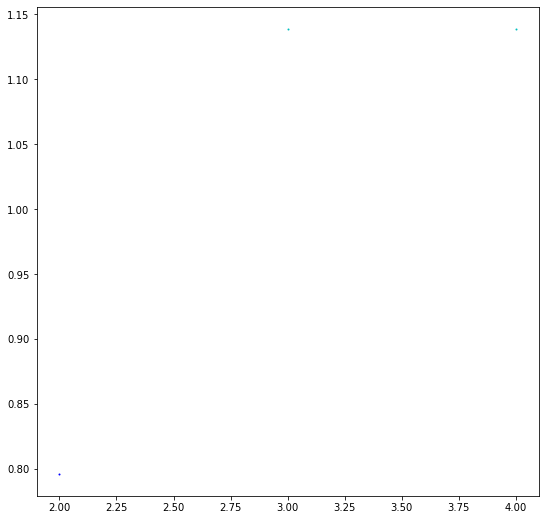

In [19]:
fig, ax1 = plt.subplots(figsize=(9,9))   
length = 1 #len(u_df)
index = 40 #Delete that field
ser2 = pd.Series(np.repeat(2, length))
ser3 = pd.Series(np.repeat(3, length))
ser4 = pd.Series(np.repeat(4, length))
ax1.scatter(ser2,u_df.open_price_u[index], s=1, c='b')
ax1.scatter(ser3,u_df.high_morning_u[index] , s=1, c='c')
ax1.scatter(ser4,u_df.high_day_u[index] , s=1, c='c')
#plt.axhline(y=p, color='r', linestyle='-', linewidth=0.3, label='bla') # for line at 1

#TODO: Filter out oulier values + check them in Datasheet


In [62]:
#Idea: Sort by open price (how much range did it loose) and compute for each mean values or all the values
# x axis write each open price in unit descending, y axis 3 points in different colors 

def f(pm_percent, 
      day_high_percentile, 
      include_later_hod, 
      float_slider,
      price_slider, 
      resistance_selector, 
      resistance_type_selector, 
      resistance_type_or,
      resistances_by_height_slider,
      resistances_by_drop_slider,
      show_resistances,
      percentage_away_from_pmh,
      percentage_away_from_hod,
      volume_m_slider,
      hide_higher_than_resistance
     ):
    
    #Filters
    #filter 1, PM high %
    pm_high_filt =  (u_df['pm_high_range_percent'] >= pm_percent[0]) & (u_df['pm_high_range_percent'] <= pm_percent[1])
    filtered_df = u_df[pm_high_filt]
    
    # PRINT LOST VALUES IN EACH FILTER STEP DUE TO NAN VALS
    #len(df[~filtered_df.pm_high_range_percent.notnull()])
    
    
    
    
    #filter 2, Float
    float_filt = (filtered_df.float_m >= float_slider[0]) & (filtered_df.float_m <= float_slider[1])
    filtered_df = filtered_df[float_filt]
    
    #filter 3, Price 
    price_filt = (filtered_df.price >= price_slider[0]) & (filtered_df.price <= price_slider[1])
    filtered_df = filtered_df[price_filt]
    
    #filter 4, Include later HOD 
    if(include_later_hod):
        percentile_filt = (filtered_df.high_day_u >= filtered_df.high_day_u.quantile(day_high_percentile[0])) & \
        (filtered_df.high_day_u <= filtered_df.high_day_u.quantile(day_high_percentile[1])) 
    else:
        percentile_filt = (filtered_df.high_morning_u >= filtered_df.high_morning_u.quantile(day_high_percentile[0])) & \
        (filtered_df.high_morning_u <= filtered_df.high_morning_u.quantile(day_high_percentile[1]))
    filtered_df = filtered_df[percentile_filt]
   
    
     #filter 5, with/without
    if(resistance_selector =='With Resistance'):
        resistance_filt = (filtered_df.resistance_price_u.notnull())
        filtered_df = filtered_df[resistance_filt]
    elif(resistance_selector == 'Without Resistance'):
        resistance_filt = (~filtered_df.resistance_price_u.notnull())
        filtered_df = filtered_df[resistance_filt]
    
    
    #filter 6, resistance type (OR/AND)
    types = ['indiv', 'consoli', 'const']
    types_filt = np.repeat( not resistance_type_or, len(filtered_df.index)) #change boolean

    if('nan' in resistance_type_selector):
        types_filt = (~filtered_df.resistance_type.notnull())
    for r_type in types:
        if(r_type in resistance_type_selector):
            temp_filt= (filtered_df['resistance_type'].str.contains(r_type, na=False))
            if(resistance_type_or):
                types_filt = types_filt | temp_filt
            else:
                types_filt = types_filt & temp_filt
        elif(not resistance_type_or):
            types_filt = types_filt & (~filtered_df['resistance_type'].str.contains(r_type, na=False))
            
    filtered_df = filtered_df[types_filt]

    
    
    #Filters - __Resistances__
     
    #filter #, resistances % away from PM H (Unit) 
    resistaince_away_unit_filt = (filtered_df.resistance_price_u - 1 >= percentage_away_from_pmh[0]) & \
    (filtered_df.resistance_price_u - 1 <= percentage_away_from_pmh[1])
    filtered_df = filtered_df[resistaince_away_unit_filt]
    
    #filter #, resistances % away from HOD 
    resistance_away_hod_filt = ((filtered_df.resistance_price_u - filtered_df.high_day_u) >= percentage_away_from_hod[0]) & \
    ((filtered_df.resistance_price_u - filtered_df.high_day_u) <= percentage_away_from_hod[1])
    filtered_df = filtered_df[resistance_away_hod_filt]
    
    #filter #, resistances volume in (M)    THIS SI CHOPPING OUT VALUES WITH RES VOL = NAN even when unwanted, only apply when (Show resistances)
    volume_m_filter = (filtered_df.resistance_volume_m >= volume_m_slider[0]) & (filtered_df.resistance_volume_m <= volume_m_slider[1])
    filtered_df = filtered_df[volume_m_filter]
    
    
    #PLOT DEFINED
    fig, ax1 = plt.subplots(figsize=(15,5)) 
    
    #PLOTTING
    #Sorting df by open price
    sorted_df = filtered_df.sort_values(by='open_price_u', ascending=False)
    series = pd.Series(sorted_df['open_price_u']) #Series unsorts it by default
    
    #filter 5, new Chart filtering Resistances
    
    ax1.axvline(x=resistances_by_drop_slider[1]*-1, ymin=0, ymax=1, color='grey', linestyle='dotted', linewidth=1.2)
    ax1.axvline(x=resistances_by_drop_slider[0]*-1, ymin=0, ymax=1, color='grey', linestyle='dotted', linewidth=1.2)
    ax1.axhline(y=resistances_by_height_slider, color='grey', linestyle='dotted', linewidth=1.2)
    
    #filter 6 (Only show resistances where filter is)
    
    resistance_filter = (sorted_df['open_price_u'] > resistances_by_drop_slider[1]*-1)\
    & (sorted_df['open_price_u'] < resistances_by_drop_slider[0]*-1) \
    & (sorted_df['resistance_price_u'] > resistances_by_height_slider)
    resistances_df = sorted_df[resistance_filter]
    if(show_resistances):
        ax1.scatter(series.sort_values(ascending=False)[resistance_filter], resistances_df['resistance_price_u'], s=20, c='r', marker='_')
    
    
    #High of the day, morning, open colors
    
    ax1.scatter(series.sort_values(ascending=False), sorted_df['open_price_u'], s=2, c='gray')
    ax1.scatter(series.sort_values(ascending=False), sorted_df['high_morning_u'], s=2, c='c')
    color_higher_day = np.where(sorted_df['high_day_u'] > sorted_df['high_morning_u'], 'b', 'c')
    if(include_later_hod):
        #if there is a Higher point later than the morning: dark blue point, else the high is assumed in the morning(light blue)
        ax1.scatter(series.sort_values(ascending=False), sorted_df['high_day_u'], s=2, c=color_higher_day)
    ax1.invert_xaxis()
    plt.axhline(y=1, color='b', linestyle='-', linewidth=0.2)
    #ax1.scatter(ser3,u_df.high_morning_u[index] , s=1, c='c')
    print("PLOT 1 RESULTS: ", len(sorted_df))

    
    # 2nd PLOT DEFINED: 
    fig2, ax2 = plt.subplots(figsize=(10,5))
    #Horizontal values
    sorted_df_2 = resistances_df.sort_values(by='resistance_volume_m', ascending=True)  #COULD BE RELATIVE RESISTANCE
    
    #Printing percentage og High under resistiance
    if(len(sorted_df_2) != 0):
        high_bigger_than_resistance_filt = (sorted_df_2.high_morning_u < sorted_df_2.resistance_price_u)
        chart_title = 'HOM under Resistance: '+str((len(sorted_df_2[high_bigger_than_resistance_filt])/len(sorted_df_2))*100)+'%'
        high_bigger_than_resistance_filt = (sorted_df_2.high_day_u < sorted_df_2.resistance_price_u)
        chart_title ='HOD under Resistance: '+str((len(sorted_df_2[high_bigger_than_resistance_filt])/len(sorted_df_2))*100)+'% \n'+chart_title 
        ax2.set_title(chart_title)
    
    # show/hide values with higher HOD/HOM than resistance
    
    if(include_later_hod and hide_higher_than_resistance): 
        high_bigger_than_resistance_filt = (sorted_df_2.high_day_u < sorted_df_2.resistance_price_u)
        sorted_df_2 = sorted_df_2[high_bigger_than_resistance_filt]
    if((not include_later_hod) and hide_higher_than_resistance):
        high_bigger_than_resistance_filt = (sorted_df_2.high_morning_u < sorted_df_2.resistance_price_u)
        sorted_df_2 = sorted_df_2[high_bigger_than_resistance_filt]
    
    #Horizontal values
    plot_x_series = pd.Series(sorted_df_2['resistance_volume_m'])
    #Vertical values
    ax2.scatter(plot_x_series.sort_values(ascending=True), sorted_df_2['resistance_price_u'], s=20, c='r', marker='_')
    ax2.scatter(plot_x_series.sort_values(ascending=True), sorted_df_2['open_price_u'], s=2, c='gray')
    ax2.scatter(plot_x_series.sort_values(ascending=True), sorted_df_2['high_morning_u'], s=2, c='c')
    
    color_higher_day = np.where(sorted_df_2['high_day_u'] > sorted_df_2['high_morning_u'], 'b', 'c') #duplicate next 3 lines could go on method
    if(include_later_hod):
        #if there is a Higher point later than the morning: dark blue point, else the high is assumed in the morning(light blue)
        ax2.scatter(plot_x_series.sort_values(ascending=True), sorted_df_2['high_day_u'], s=2, c=color_higher_day)
        
        

#IP WIDGETS
pm_percent_slider =widgets.FloatRangeSlider( #Add min and max values dynamically
    value=[u_df.pm_high_range_percent.min(), u_df.pm_high_range_percent.max()],
    min=u_df.pm_high_range_percent.min(),
    max=u_df.pm_high_range_percent.max(),
    step=0.1,
    description='pm_max_percent',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
    layout={'width':'130px'}
)

day_high_percentile_slider = widgets.FloatRangeSlider(
    value=[0, 1],
    min=0,
    max=1.0,
    step=0.01,
    description='day_high_percentile',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=True,
    readout_format='.2f',
    layout={'width':'130px'}
)

include_later_hod = widgets.Checkbox(
    value=False,
    description='HOD_after_morning',
    disabled=False,
    indent=False,
    layout={'width':'140px'}
)

float_slider =widgets.FloatRangeSlider(
    value=[u_df.float_m.min(), u_df.float_m.max()],
    min=u_df.float_m.min(),
    max=u_df.float_m.max(),
    step=0.1,
    description='float',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

price_slider =widgets.FloatRangeSlider(
    value=[u_df.price.min(), u_df.price.max()],
    min=u_df.price.min(),
    max=u_df.price.max(),
    step=0.1,
    description='price',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

resistance_selector = widgets.Select(
    options=['Show All', 'With Resistance', 'Without Resistance'],
    value='Show All',
    rows=3,
    description='Res. Selector',
    disabled=False
)

#Make dependent on the one above
resistance_type_selector = widgets.SelectMultiple(
    options=[('None','nan'), ('Individual','indiv'), ('Consolidation','consoli'), ('Constant','const')],
    value=['nan', 'indiv', 'consoli', 'const'],
    rows=4,
    description='Types',
    disabled=False  #Make it dependent of "resistance_selector"
)

resistance_type_or = widgets.Dropdown(
    options=[('OR', True), ('AND', False)],
    value=True,
    description='Types or/and',
    layout={'margin':'20px 20px 20px 20px'}
)

resistances_by_height_slider =widgets.FloatSlider(  #How to make the min/max dynamic? 
    value=u_df.open_price_u.min()-0.5,                #-> Make dependent on the HOD percentile chosen!(new function) that returns this val
    min=u_df.open_price_u.min()-0.01,
    max=u_df.high_day_u.max(),
    step=0.01,
    description='Resistances by Height',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=True,
    readout_format='.2f',
)

resistances_by_drop_slider =widgets.FloatRangeSlider(
    value=[(u_df.open_price_u.max()+0.01)*-1, (u_df.open_price_u.min()-0.03)*-1],
    min=(u_df.open_price_u.max()+0.01)*-1,
    max=(u_df.open_price_u.min()-0.03)*-1,
    
    step=0.005,
    description='Resistances by PM drop %',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)

show_resistances = widgets.Checkbox(
    value=True,
    description='show resistances',
    disabled=False,
    indent=False
)

percentage_away_from_pmh = widgets.FloatRangeSlider(
    value=[u_df.resistance_price_u.min() - 1, u_df.resistance_price_u.max() - 1],
    min=u_df.resistance_price_u.min() - 1,
    max=u_df.resistance_price_u.max() - 1,
    step=0.01,
    description='  % away from PM H (unit)',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=True,
    readout_format='.2f',
    layout={'width':'150px'}
)

percentage_away_from_hod = widgets.FloatRangeSlider(
    value=[(u_df.resistance_price_u - u_df.high_day_u).min(), (u_df.resistance_price_u - u_df.high_day_u).max()],
    min=(u_df.resistance_price_u - u_df.high_day_u).min(),    # min() -> quantile(0.1) ...the min was way too low, no ease of usage
    max=(u_df.resistance_price_u - u_df.high_day_u).max(), 
    step=0.01,
    description='% away from HOD',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=True,
    readout_format='.2f',
    layout={'width':'150px'}
)

volume_m_slider =widgets.FloatRangeSlider(                                      ##CHECKK MAYBE IS DELETING DATA WHICH HAV R VOL = 0
    value=[u_df.resistance_volume_m.min(), u_df.resistance_volume_m.max()],
    max=u_df.resistance_volume_m.max(),
    step=0.1,
    description='resistance volume',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

hide_higher_than_resistance = widgets.Checkbox(
    value=False,
    description='hide higher than res.',
    disabled=False,
    indent=False
)


widget = interactive(f, pm_percent = pm_percent_slider, 
                 day_high_percentile = day_high_percentile_slider, 
                 include_later_hod = include_later_hod,
                 float_slider = float_slider,
                 price_slider = price_slider,
                 resistance_selector = resistance_selector,
                 resistance_type_selector = resistance_type_selector,
                 resistance_type_or = resistance_type_or,
                 resistances_by_height_slider = resistances_by_height_slider,
                 resistances_by_drop_slider = resistances_by_drop_slider,
                 show_resistances = show_resistances,
                 percentage_away_from_pmh = percentage_away_from_pmh,
                 percentage_away_from_hod = percentage_away_from_hod,
                 volume_m_slider = volume_m_slider,
                 hide_higher_than_resistance = hide_higher_than_resistance
                )

# Layout:

box1_layout = Layout(
                    #display='flex',
                    flex_flow='row',
                    align_items='flex-end',
                    width='100%',
                    )

box11_layout = Layout(
                    #display='flex',
                    #align_content = 'flex-end'
                    #flex_flow='row',
                    align_items='flex-end',
                    #border='solid',
                    #width='50%'
                    )

box12_layout = Layout(
                    #border='solid',
                    #align_items= 'flex-start',
                    )

#1st row
box11 = HBox(widget.children[:3], layout = box11_layout)
box12 = VBox(widget.children[3:5], layout = box12_layout)
row1 = HBox([box11, box12], layout = box1_layout)
#2nd row
box21 = VBox((widget.children[10],) + widget.children[5:7])
box22 = VBox([widget.children[7], widget.children[9]])
box23 = VBox([widget.children[8]])
row2 = HBox([box21, box22, box23] , layout = box1_layout)
#3rd row
box31 = HBox([widget.children[11], widget.children[12]])
box32 = VBox([widget.children[13], widget.children[14]])
row3=  HBox([box31, box32])
#row_test = HBox(widget.children[:-1] , layout = Layout(flex_flow='row wrap'))
output = widget.children[-1]
#Merged Rows
display(VBox([row1, row2, output, row3]))
widget.update()



In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(len(u_df))
    
    
    #Filter out resistance price=null
    u_df = u_df[u_df.resistance_price_u.notnull()]
    #Filter out all values which are bigger than resistance
    bigger_than_df = u_df[u_df.high_day_u > u_df.resistance_price_u]
    #compare
    
    print(len(bigger_than_df),len(u_df.resistance_price_u))
    print(u_df[['resistance_price_u', 'high_day_u']]) #pm_high_percent  #pm_high_range_percentage
    print(bigger_than_df[['resistance_price_u', 'high_day_u']])
    
plt.close('all')

170
14 170
     resistance_price_u  high_day_u
0              1.705285    0.877110
1              1.822602    1.000000
3              1.674131    0.820812
5              1.423954    1.008626
6              2.005924    0.954533
8              1.765847    0.811518
9              3.035377    1.778302
10             1.165058    0.765224
11             1.244235    1.863602
12             0.903222    0.409516
13             1.514573    1.000000
14             3.959455    0.904545
17             1.928362    0.959738
18             1.836480    1.489215
20             1.345576    0.882993
21             2.242645    0.951247
22             1.698289    0.745257
23             1.973780    0.813592
24             2.384757    1.265310
25             1.643275    0.792453
26             1.859016    1.331967
27             1.618421    1.293665
28             1.542533    1.049282
29             2.124421    1.142244
30             1.125688    0.733498
32             2.362518    1.324156
33             1.

-> Future ideas, filter the percentiles per "zones" of PM drop <br>
<img src="ip_widget_ideas.png" alt="Drawing" style="width: 1000px;"/>